# TP : Pratiquons Quelques algorithmes sur le jeu de données de l'ozone

Appliquons quelques algorithmes à l'échantillon ozone.
Pour ce faire on va modéliser le pic d'ozone journalier en fonction de toutes les autres variables météorologiques.

## Importation des données

On importe les librairies nécessaires pour ce TP :

In [950]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [1072]:
data = pd.read_csv("ozone.txt", sep=";", parse_dates = True)

In [970]:
data.shape # taille des données

(1366, 14)

In [1073]:
data.head(1193)# affiche les 5 premiers observations des données

date  maxO3    T6    T9   T12   T15   T18  Ne6  Ne9  Ne12  Ne15  \
1     19940401   56.0   8.6   9.5   6.8   9.1   7.7    6    3     6     7   
2     19940402   39.2   3.6   5.6   9.2   8.4   4.9    3    4     6     7   
3     19940403   36.0   2.7   7.3   6.3   7.0   7.9    6    8     8     8   
4     19940404   41.2  11.8  11.8  11.0   7.0   7.7    8    7     6     7   
5     19940405   27.6   3.7   8.3  11.6  10.7   7.9    6    3     6     6   
...        ...    ...   ...   ...   ...   ...   ...  ...  ...   ...   ...   
1189  20000926   72.0  12.2  18.2  21.7  22.0  18.5    5    5     6     4   
1190  20000927   51.0  10.9  15.4  19.2  18.0  16.4    1    6     7     8   
1191  20000928   67.0  15.2  15.5  17.2  17.6  15.5    8    8     7     7   
1192  20000929   72.0  12.6  15.6  18.6  18.6  16.3    6    1     4     2   
1193  20010401   80.0   7.1  11.5  15.8  18.8  17.6    5    7     6     5   

     Ne18       Vx  maxO3v  
1       4 -10.8329    59.6  
2       7 -10.3366    56.0  
3       8  -1.0419    39.2  
4       3 -10.3366    36.0  
5       6  -8.8633    41.2  
...   ...      ...     ...  
1189    4  -4.4995    72.0  
1190    8  -4.4995    72.0  
1191    7  -4.3301    51.0  
1192    2  -0.8682    67.0  
1193    4   3.0642    83.0  

[1193 rows x 14 columns]

In [1074]:
data.shape

(1366, 14)

- Vérification des valeurs manquantes

In [1075]:
data.isna().sum() # regarde 'il y a des valeurs mabnquantes'

date      0
maxO3     0
T6        0
T9        0
T12       0
T15       0
T18       0
Ne6       0
Ne9       0
Ne12      0
Ne15      0
Ne18      0
Vx        0
maxO3v    0
dtype: int64

On remarque bien qu'il n' y a pas de valeurs manquentes

In [1076]:
data.describe() 

date        maxO3           T6           T9          T12  \
count  1.366000e+03  1366.000000  1366.000000  1366.000000  1366.000000   
mean   1.997552e+07    79.281406    12.370571    16.418668    19.427379   
std    2.334820e+04    27.089361     3.935628     4.222436     5.078967   
min    1.994040e+07    15.000000    -1.600000     4.500000     5.700000   
25%    1.995091e+07    63.000000    10.100000    13.825000    16.200000   
50%    1.998041e+07    76.800000    12.700000    16.700000    19.450000   
75%    2.000041e+07    94.000000    15.200000    19.100000    22.700000   
max    2.001093e+07   166.000000    21.700000    28.600000    33.500000   

               T15          T18          Ne6          Ne9         Ne12  \
count  1366.000000  1366.000000  1366.000000  1366.000000  1366.000000   
mean     20.325037    18.773133     5.045388     5.199122     5.345534   
std       5.411646     5.205040     2.882712     2.545676     2.333842   
min       5.700000     4.400000     0.000000     0.000000     0.000000   
25%      16.725000    15.400000     2.000000     3.000000     4.000000   
50%      20.350000    18.700000     6.000000     6.000000     6.000000   
75%      24.000000    22.100000     8.000000     7.000000     7.000000   
max      35.500000    34.100000     9.000000     9.000000     8.000000   

              Ne15           Vx       maxO3v  
count  1366.000000  1366.000000  1366.000000  
mean      5.143485    -0.801013    79.314641  
std       2.351817     3.413141    27.304353  
min       0.000000   -10.832900    15.000000  
25%       3.000000    -3.213900    63.000000  
50%       6.000000    -1.026100    76.700000  
75%       7.000000     1.532100    94.000000  
max       8.000000     8.660300   173.000000

In [1077]:
data.columns # les colonnes du jeu de données

Index(['date', 'maxO3', 'T6', 'T9', 'T12', 'T15', 'T18', 'Ne6', 'Ne9', 'Ne12',
       'Ne15', 'Ne18', 'Vx', 'maxO3v'],
      dtype='object')

In [1078]:
data.dtypes # type de nos variables

date        int64
maxO3     float64
T6        float64
T9        float64
T12       float64
T15       float64
T18       float64
Ne6         int64
Ne9         int64
Ne12        int64
Ne15        int64
Ne18       object
Vx        float64
maxO3v    float64
dtype: object

On voit bien que le type de la variable Ne18 est "object", or normalement par cohérence avec les variables (Ne15, Ne12 etc.) on devrait avoir comme type (un int ou float). On corrigera cela par la suite.

- Remettons la date au bon format

In [1079]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')# mettre la date au bon format

In [1080]:
#np.unique(data["Ne18"])
np.unique(data["Ne18"]) # vérifie les unique valeurs dans Ne18

array(['.', '0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype=object)

In [1081]:
data["Ne18"] = pd.to_numeric(data['Ne18'], errors = "coerce") # mettre le type "Ne18" en numérique

In [1082]:
data['Ne18']=data['Ne18'].fillna(7)  # remplacer la colonne contenant "." par 7 car 7 est la valeur la plus fréquente

In [1083]:
data["Ne18"].unique()

array([4., 7., 8., 3., 6., 5., 1., 2., 0.])

In [1084]:
data['Ne18'] = data['Ne18'].astype(int) # convertir la colonne "Ne18" en type int

In [1085]:
data.dtypes # visialisons les types de nouveaux maintenant

date      datetime64[ns]
maxO3            float64
T6               float64
T9               float64
T12              float64
T15              float64
T18              float64
Ne6                int64
Ne9                int64
Ne12               int64
Ne15               int64
Ne18               int64
Vx               float64
maxO3v           float64
dtype: object

In [985]:
date_index = pd.DatetimeIndex(data["date"].values)
data = data.set_index(date_index)
#data.drop('date', axis = 1, inplace = True)
data

date  maxO3    T6    T9   T12   T15   T18  Ne6  Ne9  Ne12  \
1994-04-01 1994-04-01   56.0   8.6   9.5   6.8   9.1   7.7    6    3     6   
1994-04-02 1994-04-02   39.2   3.6   5.6   9.2   8.4   4.9    3    4     6   
1994-04-03 1994-04-03   36.0   2.7   7.3   6.3   7.0   7.9    6    8     8   
1994-04-04 1994-04-04   41.2  11.8  11.8  11.0   7.0   7.7    8    7     6   
1994-04-05 1994-04-05   27.6   3.7   8.3  11.6  10.7   7.9    6    3     6   
...               ...    ...   ...   ...   ...   ...   ...  ...  ...   ...   
2001-09-25 2001-09-25   84.0  10.6  13.3  17.7  17.8  16.5    7    3     5   
2001-09-27 2001-09-27   77.0  13.5  16.2  20.8  22.1  20.0    8    6     5   
2001-09-28 2001-09-28   99.0  11.7  16.9  23.0  22.6  18.9    6    6     4   
2001-09-29 2001-09-29   83.0  16.2  16.9  19.8  22.1  18.1    8    6     5   
2001-09-30 2001-09-30   70.0  14.5  15.7  18.6  20.7  18.0    8    7     7   

            Ne15  Ne18       Vx  maxO3v  
1994-04-01     7     4 -10.8329    59.6  
1994-04-02     7     7 -10.3366    56.0  
1994-04-03     8     8  -1.0419    39.2  
1994-04-04     7     3 -10.3366    36.0  
1994-04-05     6     6  -8.8633    41.2  
...          ...   ...      ...     ...  
2001-09-25     6     8  -1.0000    76.0  
2001-09-27     5     5  -2.0000    71.0  
2001-09-28     7     8   0.8682    77.0  
2001-09-29     3     1  -3.7588    99.0  
2001-09-30     7     8  -1.0419    83.0  

[1366 rows x 14 columns]

## Analyse descriptives

- Distributions des variables

In [986]:
X = data[data.columns[:-1]].values

In [987]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range((X.shape[1]-1)):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx+1], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx+1], fontsize=14)

On voit bien que les variables températures ont une distributions normales, de meme que la variable maxo3 et Vx. Les valeurs qu'elles prennes aussi sont à peu prés dans la meme échelle.

- Comportement de la variable maxo3

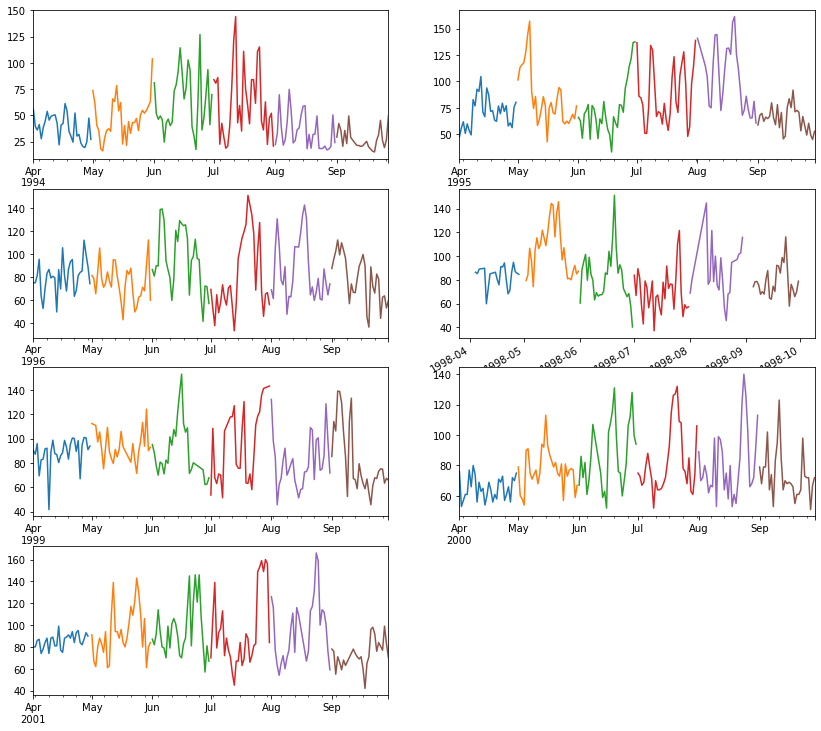

In [1043]:
plt.figure(figsize=(14,14))
plt.subplot(4,2,1),
data.loc["1994", "maxO3"].resample("M").plot()
plt.subplot(4,2,2)
data.loc["1995", "maxO3"].resample("M").plot()
plt.subplot(4,2,3)
data.loc["1996", "maxO3"].resample("M").plot()
plt.subplot(4,2,4)
data.loc["1998", "maxO3"].resample("M").plot()
plt.subplot(4,2,5)
data.loc["1999", "maxO3"].resample("M").plot()
plt.subplot(4,2,6)
data.loc["2000", "maxO3"].resample("M").plot()
plt.subplot(4,2,7)
data.loc["2001", "maxO3"].resample("M").plot()
plt.show()

<Figure size 288x288 with 0 Axes>

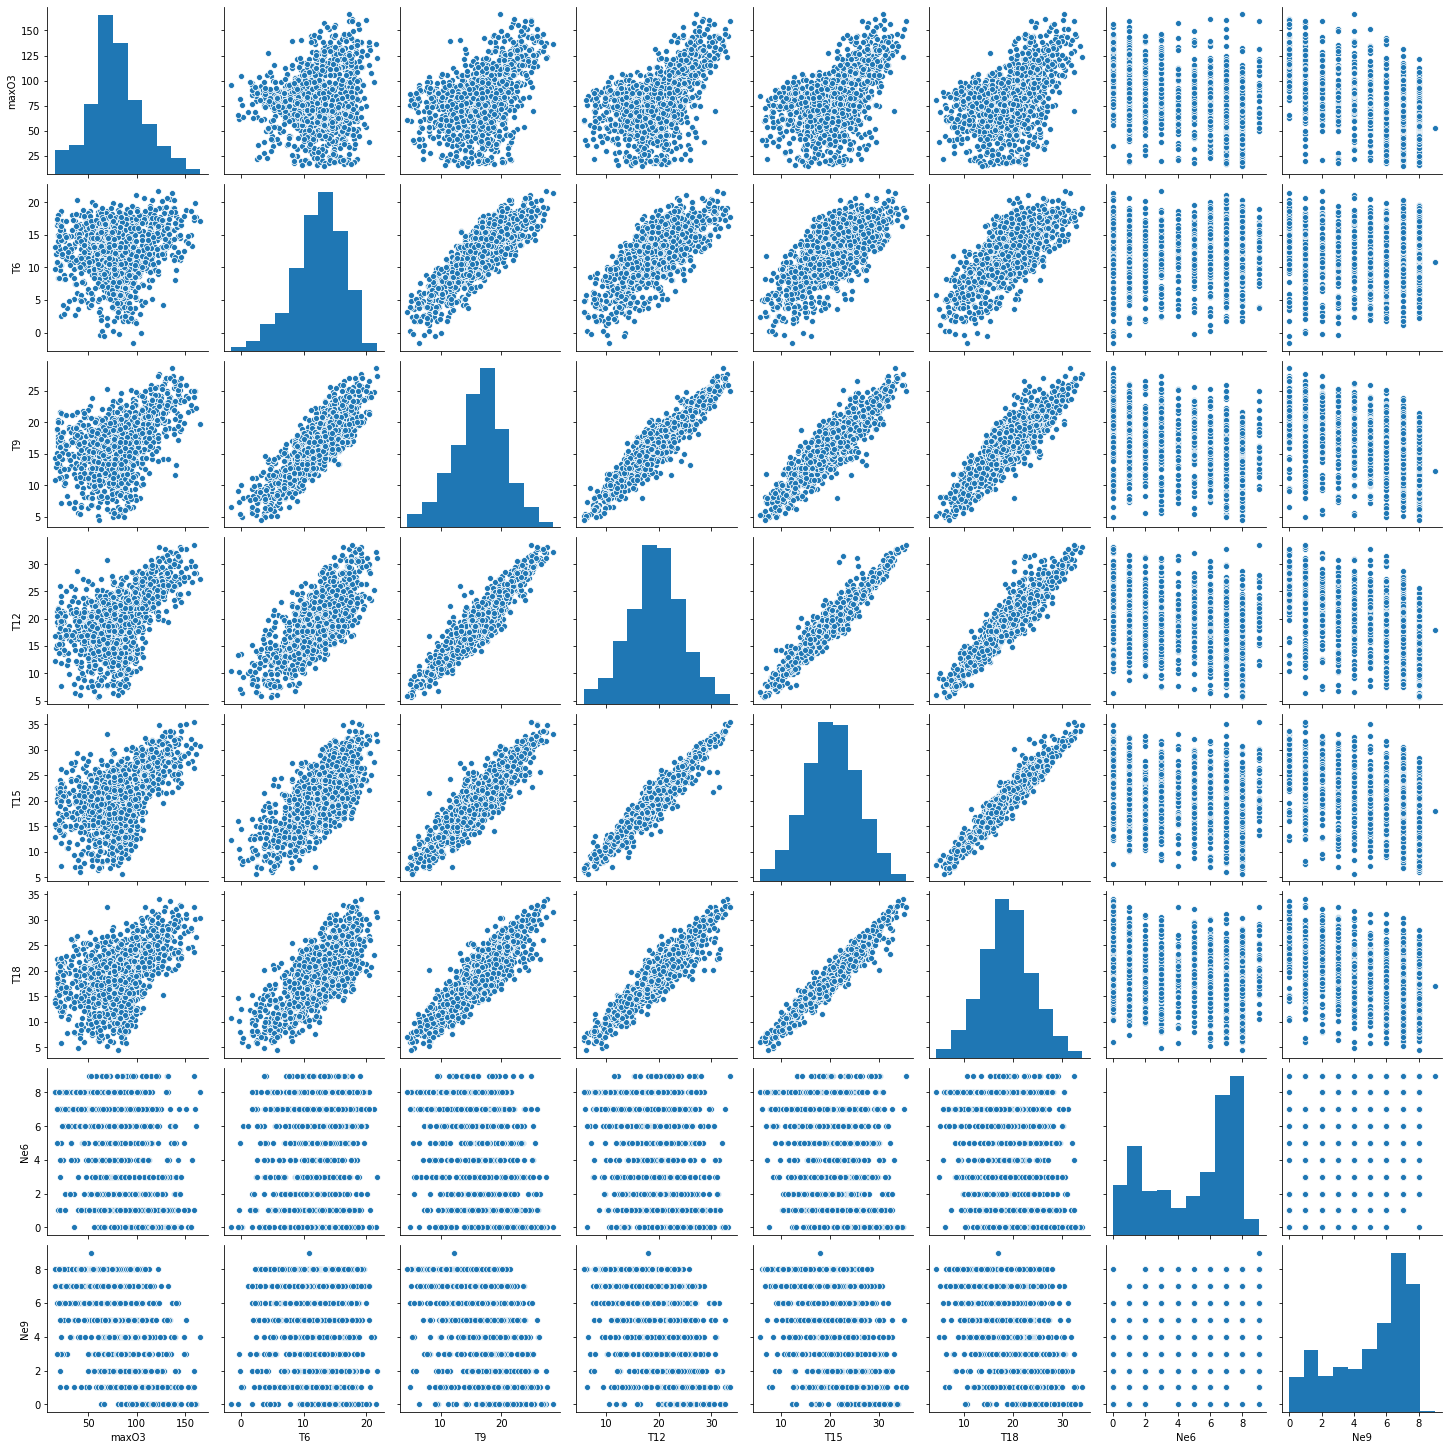

In [1005]:
plt.figure(figsize=(4,4))
sns.pairplot(data[["maxO3","T6", "T9", "T12", "T15", "T18", "Ne6", "Ne9"]])
plt.show()

- Corrélation entre les variales

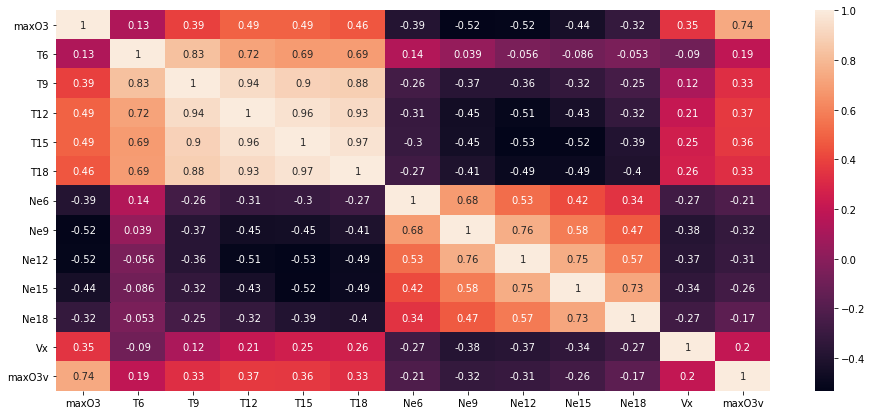

In [724]:
plt.figure(figsize=(16,7))
sns.heatmap(data.iloc[:,1:].corr(), annot=True)

On remarque qu'il y a une corrélation moyenne entre maxo3 et les variable T12 et T15. Cependant il y a une forte corrélation entre les températures, mais c'est normal. On peut voir aussi que le pic d'ozone de la veille est trés corrélé au pic d'ozone journalier. Ceci est trés normale.
Dans notre modélisation aprés un premier modèle, on essayera de voir comme on peut améliorer en ne considérant que certaines variables

- Regardons la variable max03 en fonction de T12

No handles with labels found to put in legend.


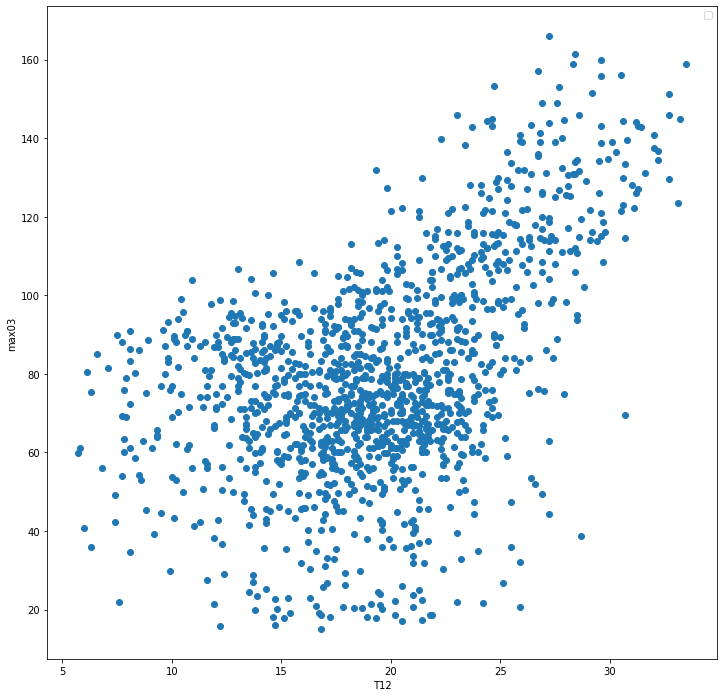

In [824]:
plt.figure(figsize=(12,12))
plt.scatter(data["T12"], data["maxO3"])
plt.xlabel("T12")
plt.ylabel("max03")
plt.legend()
plt.show()

## Application du Randomforest sur les données

In [1086]:
X_train = data.iloc[:1193, 2:]# je vais considérer les observations jusu'avavnt le 01/04/2001 pour l'entrainement
X_test = data.iloc[1193:, 2:]# je considére pour les données tests à partir de 01/04/2001 et je vais prédire j+1

In [1087]:
X_test # base de test

T6    T9   T12   T15   T18  Ne6  Ne9  Ne12  Ne15  Ne18      Vx  maxO3v
1194   9.5  14.8  17.8  18.4  11.5    1    6     6     7     8 -0.8682    80.0
1195   7.7  11.7  14.7  12.8  12.4    1    4     7     7     7 -2.3941    80.0
1196   7.9  10.1  10.7  11.6   8.8    4    4     5     6     3 -6.9282    86.0
1197   6.5   8.6  11.3  11.0  13.4    7    8     8     8     6 -4.5000    87.0
1198  11.2  12.4  13.1  14.1  12.4    7    8     8     7     6 -4.5963    74.0
...    ...   ...   ...   ...   ...  ...  ...   ...   ...   ...     ...     ...
1362  10.6  13.3  17.7  17.8  16.5    7    3     5     6     8 -1.0000    76.0
1363  13.5  16.2  20.8  22.1  20.0    8    6     5     5     5 -2.0000    71.0
1364  11.7  16.9  23.0  22.6  18.9    6    6     4     7     8  0.8682    77.0
1365  16.2  16.9  19.8  22.1  18.1    8    6     5     3     1 -3.7588    99.0
1366  14.5  15.7  18.6  20.7  18.0    8    7     7     7     8 -1.0419    83.0

[173 rows x 12 columns]

In [1113]:
y_train = data.iloc[:1193, 1] # la base comportant les étiquettes pour la base d'entrainement
y_test = data.iloc[1193:, 1] # la base comportant les étiquettes pour la base de test

In [1089]:
y_train

1       56.0
2       39.2
3       36.0
4       41.2
5       27.6
        ... 
1189    72.0
1190    51.0
1191    67.0
1192    72.0
1193    80.0
Name: maxO3, Length: 1193, dtype: float64

In [856]:
y_test

1194    80.0
1195    86.0
1196    87.0
1197    74.0
1198    78.0
        ... 
1362    84.0
1363    77.0
1364    99.0
1365    83.0
1366    70.0
Name: maxO3, Length: 173, dtype: float64

In [830]:
# On importe l'algorithme à partir de sklearn
from sklearn.ensemble import RandomForestRegressor

In [831]:
#On créé un Random Forest de 500 arbres 
rf = RandomForestRegressor(n_estimators = 500, random_state = 2020)

In [832]:
rf.fit(X_train, y_train)# j'entraine sur les données d'entrainement

RandomForestRegressor(n_estimators=500, random_state=2020)

In [833]:
X_test_t1 = X_test.iloc[0,:]# les valeurs de j+1 à mettre pour prévoir le pic d'ozone à j+1

In [834]:
X_test_t1 = pd.DataFrame(X_test_t1) # mettre ces valeurs sous forme de DataFrame
X_test_t1 = X_test_t1.T

In [835]:
#On applique le modèle que l'on vient 
#d'entraîner sur l'échantillon de d'entrainement pour prédire j+1, c'est à dire le 01/04/2001
predictions = rf.predict(X_test_t1)

In [836]:
predictions

array([77.6012])

- Prédire les 150 jours à venir à partir du 01/04/2001 en glissant

In [837]:
# Définnisons une fonction qui fera cette prédiction
def prediction_data(X_train, y_train, X_test_hor1):
    
    model = RandomForestRegressor(n_estimators = 500, random_state = 2020)
    model.fit(X_train, y_train)
    X_test_hor1 = pd.DataFrame(X_test_hor1)
    X_test_hor1 = X_test_hor1.T
    prediction = model.predict(X_test_hor1)
    return prediction

In [848]:
# On va créer 10 modéles à chaque fois et prédire j+1 avec les différentes modèles
tab_predict = []

for i in range(100):
    predict_data = prediction_data(data.iloc[:1192+i,2:], data.iloc[:1192+i, 1],  X_test.iloc[i,:])
    tab_predict.append(predict_data)

In [857]:
y_test = y_test[:100] # les vraie valeurs des 150 jours à venir

y_test = pd.DataFrame(y_test)

In [858]:
tab_predict = np.array(tab_predict)

In [859]:
y_test = np.array(y_test)

- Evaluons l'erreur de prédiction

In [860]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, tab_predict))
print("RMSE SUR LE RANDOMFOREST EST: {:.2f}".format(rmse))

RMSE SUR LE RANDOMFOREST EST: 14.66


## Application du Gradient Boosting sur le jeu de donnée

In [861]:
from sklearn.ensemble import GradientBoostingRegressor

In [1105]:
def prediction_data_2(X_train, y_train, X_test_hor1):
    
    model = GradientBoostingRegressor(n_estimators = 500)
    model.fit(X_train, y_train)
    X_test_hor1 = pd.DataFrame(X_test_hor1)
    X_test_hor1 = X_test_hor1.T
    prediction = model.predict(X_test_hor1)
    return prediction

In [1106]:
tab_predict_2 = []

for i in range(100):
    predict_data_2 = prediction_data_2(data.iloc[:1192+i,2:], data.iloc[:1192+i, 1],  X_test.iloc[i,:])
    tab_predict_2.append(predict_data_2)

In [1107]:
y_test_2 = y_test[:100] # les vraie valeurs des 150 jours à venir

y_test_2 = pd.DataFrame(y_test_2)

In [1108]:
tab_predict_2 = np.array(tab_predict_2)

In [1109]:
y_test_2 = np.array(y_test_2)

In [1110]:
rmse = np.sqrt(metrics.mean_squared_error(y_test_2, tab_predict_2))
print("RMSE SUR LE GRADIENT BOOSTING: {:.2f}".format(rmse))

RMSE SUR LE GRADIENT BOOSTING: 14.38


## Application de la regression multiple sur le jeu de donnée

In [747]:
new_data = data[["maxO3", "T12", "Ne9", "maxO3v"]]

In [748]:
new_data

maxO3   T12  Ne9  maxO3v
1      56.0   6.8    3    59.6
2      39.2   9.2    4    56.0
3      36.0   6.3    8    39.2
4      41.2  11.0    7    36.0
5      27.6  11.6    3    41.2
...     ...   ...  ...     ...
1362   84.0  17.7    3    76.0
1363   77.0  20.8    6    71.0
1364   99.0  23.0    6    77.0
1365   83.0  19.8    6    99.0
1366   70.0  18.6    7    83.0

[1366 rows x 4 columns]

In [751]:
# je vais considérer les observations jusu'avavnt le 01/04/2001 pour l'entrainement
X_train_new = new_data.iloc[:1193, 1:]
X_test_new = new_data.iloc[1193:, 1:]
# je considére pour les données tests à partir de 01/04/2001 et je vais prédire j+1

In [1095]:
X_train_reg = data.iloc[:1193, 1:]
X_test_reg = data.iloc[1193:, 1:]

In [1096]:
X_train_reg

maxO3    T6    T9   T12   T15   T18  Ne6  Ne9  Ne12  Ne15  Ne18  \
1      56.0   8.6   9.5   6.8   9.1   7.7    6    3     6     7     4   
2      39.2   3.6   5.6   9.2   8.4   4.9    3    4     6     7     7   
3      36.0   2.7   7.3   6.3   7.0   7.9    6    8     8     8     8   
4      41.2  11.8  11.8  11.0   7.0   7.7    8    7     6     7     3   
5      27.6   3.7   8.3  11.6  10.7   7.9    6    3     6     6     6   
...     ...   ...   ...   ...   ...   ...  ...  ...   ...   ...   ...   
1189   72.0  12.2  18.2  21.7  22.0  18.5    5    5     6     4     4   
1190   51.0  10.9  15.4  19.2  18.0  16.4    1    6     7     8     8   
1191   67.0  15.2  15.5  17.2  17.6  15.5    8    8     7     7     7   
1192   72.0  12.6  15.6  18.6  18.6  16.3    6    1     4     2     2   
1193   80.0   7.1  11.5  15.8  18.8  17.6    5    7     6     5     4   

           Vx  maxO3v  
1    -10.8329    59.6  
2    -10.3366    56.0  
3     -1.0419    39.2  
4    -10.3366    36.0  
5     -8.8633    41.2  
...       ...     ...  
1189  -4.4995    72.0  
1190  -4.4995    72.0  
1191  -4.3301    51.0  
1192  -0.8682    67.0  
1193   3.0642    83.0  

[1193 rows x 13 columns]

In [1054]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
reg = smf.ols('maxO3~T6+T9+T12+T15+T18+Ne6+Ne9+Ne12+Ne15+Ne18+Vx+maxO3v', data=X_train_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.29e-290
Time:                        18:44:45   Log-Likelihood:                -4927.3
No. Observations:                1193   AIC:                             9881.
Df Residuals:                    1180   BIC:                             9947.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2563      3.561      7.092      0.0

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

Le $R^{2}$ vaut environ 0.69, et le $R^{2}$ ajusté est d'environ 0.69 à peu prés



## Retirez les variables non significatives

On va donc maintenant retirer les variables non significatives. On commence par la moins significative : T18, car elle a une p-valeur de 0.982.

In [1055]:
reg = smf.ols('maxO3~T6+T9+T12+T15+Ne6+Ne9+Ne12+Ne15+Ne18+Vx+maxO3v', data=X_train_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          8.13e-292
Time:                        18:53:32   Log-Likelihood:                -4927.3
No. Observations:                1193   AIC:                             9879.
Df Residuals:                    1181   BIC:                             9940.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2606      3.555      7.106      0.0

- On constate qu'il faut retirer la variable T9

In [1057]:
reg = smf.ols('maxO3~T6+T12+T15+Ne6+Ne9+Ne12+Ne15+Ne18+Vx+maxO3v', data=X_train_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     264.2
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          5.04e-293
Time:                        20:41:11   Log-Likelihood:                -4927.3
No. Observations:                1193   AIC:                             9877.
Df Residuals:                    1182   BIC:                             9933.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4663      3.465      7.350      0.0

- De la meme manière in retire Ne6

In [1058]:
reg = smf.ols('maxO3~T6+T12+T15+Ne9+Ne12+Ne15+Ne18+Vx+maxO3v', data=X_train_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     293.7
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          3.25e-294
Time:                        20:42:16   Log-Likelihood:                -4927.5
No. Observations:                1193   AIC:                             9875.
Df Residuals:                    1183   BIC:                             9926.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.1914      3.420      7.365      0.0

- On retire aussi la T15

In [1059]:
reg = smf.ols('maxO3~T6+T12+Ne9+Ne12+Ne15+Ne18+Vx+maxO3v', data=X_train_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     330.5
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          2.32e-295
Time:                        20:44:39   Log-Likelihood:                -4927.8
No. Observations:                1193   AIC:                             9874.
Df Residuals:                    1184   BIC:                             9919.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8440      3.312      7.803      0.0

- On voit aussi que la variable Ne18 n'est pas significative, on l'enlève

In [1060]:
reg = smf.ols('maxO3~T6+T12+Ne9+Ne12+Ne15+Vx+maxO3v', data = X_train_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     377.7
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.72e-296
Time:                        20:45:57   Log-Likelihood:                -4928.2
No. Observations:                1193   AIC:                             9872.
Df Residuals:                    1185   BIC:                             9913.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8708      3.312      7.812      0.0

- On enlève aussi la variable Ne9

In [1061]:
reg = smf.ols('maxO3~T6+T12+Ne12+Ne15+Vx+maxO3v', data=X_train_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     439.4
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          3.33e-297
Time:                        20:48:05   Log-Likelihood:                -4929.6
No. Observations:                1193   AIC:                             9873.
Df Residuals:                    1186   BIC:                             9909.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0376      3.134      7.670      0.0

On remarque maintenant que, tous les paramètres sont significatifs. on voit aussi que le $R^{2}$ vaut environ 0.69, de meme que le $R^{2}$ ajusté.

*On peut donc utiliser ce modèle à des fins de prévision !*

C'est que l'on va faire par la suite en glissant

In [1092]:
def prediction_data_reg(X_train, X_test_hor1):
    
    reg = smf.ols('maxO3~T6+T12+Ne9+Ne12+Ne15+Vx+maxO3v', data = X_train).fit()
    X_test_hor1 = pd.DataFrame(X_test_hor1)
    X_test_hor1 = X_test_hor1.T
    prediction = reg.predict(X_test_hor1)
    return prediction

In [1100]:
tab_predict_reg = []

for i in range(100):
    predict_data_reg = prediction_data_reg(X_train_reg.iloc[:1192+i,:], X_test_reg.iloc[i,1:])
    tab_predict_reg.append(round(predict_data_reg))

In [1102]:
tab_predict_reg = np.array(tab_predict_reg )

In [1104]:
rmse = np.sqrt(metrics.mean_squared_error(y_test_2, tab_predict_reg))
print("RMSE SUR LA REGRESSION EST: {:.2f}".format(rmse))

RMSE SUR LA REGRESSION EST: 15.80
